In [2]:
import mlcTest as mt
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

{'signal': [0.1944551318883896, 0.929099977016449]}


In [156]:
data = pd.read_csv('test_result.csv')
predicted_cons = []
for i in range(len(data)):
    if data.prediction[i] in [j for j in range(0,4)]:
        predicted_cons.append(1)
    else:
        predicted_cons.append(2)
test = data.assign(predicted_cons=predicted_cons)

In [48]:
data

,real,imag,cons,block,label,interference,buffer,label_real,label_imag,prediction
0,0.120629,0.117264,2,1,10,1,(0.31622776601683794+0.31622776601683794j),0.316228,0.316228,10
1,-0.038891,0.152451,2,1,9,1,(-0.31622776601683794+0.31622776601683794j),-0.316228,0.316228,9
2,0.481826,-0.876530,2,1,19,1,(0.9486832980505138-0.9486832980505138j),0.948683,-0.948683,19
3,0.533483,-0.142285,2,1,15,1,(0.9486832980505138-0.31622776601683794j),0.948683,-0.316228,15
4,0.421070,0.472924,2,1,10,1,(0.31622776601683794+0.31622776601683794j),0.316228,0.316228,6
...,...,...,...,...,...,...,...,...,...,...
9595,-0.167899,-0.299525,2,993,13,0,(-0.31622776601683794-0.31622776601683794j),-0.316228,-0.316228,13
9596,-0.568121,0.242732,2,993,8,0,(-0.9486832980505138+0.31622776601683794j),-0.948683,0.316228,8
9597,-0.157070,-0.660922,2,993,17,0,(-0.31622776601683794-0.9486832980505138j),-0.316228,-0.948683,17
9598,-0.210914,-0.207288,2,993,13,0,(-0.31622776601683794-0.31622776601683794j),-0.316228,-0.316228,13


# 1 
- P(Constellation Error | Constellation = 4QAM)
- P(Constellation Error | Constellation = 16QAM)

In [43]:
real_label = data.label
pred_label = data.prediction

In [44]:
cf = tf.math.confusion_matrix(real_label, pred_label).numpy()
cf = pd.DataFrame(cf)

In [247]:
cons_4 = test[test.cons==1]
cons_16 = test[test.cons==2]
total_cons_error = cons_4_error + cons_16_error
cons_4_error_rate = cons_4_error / total_cons_error
cons_16_error_rate = cons_16_error / total_cons_error

In [249]:
print("CONS_ERROR|4QAM  IS: ", cons_4_error_rate)
print("CONS_ERROR|16QAM IS: ", cons_16_error_rate)

CONS_ERROR|4QAM  IS:  0.6870540265035678
CONS_ERROR|TOTAL IS:  0.3129459734964322


# 2
- P(Constellation Error | Interference)
- P(Constellation Error | No Interference)

In [181]:
data_with_ins = data[data.interference==1]
ins_label = data_with_ins.label
ins_prediction = data_with_ins.prediction
cons_error = sum(test.cons!=test.predicted_cons)

In [50]:
cf_ins = tf.math.confusion_matrix(cons_label, cons_prediction).numpy()
cf_ins = pd.DataFrame(cf_cons)

In [182]:
interference_data = test[data.interference==1]
interference_cons_error = sum(interference_data.cons!=interference_data.predicted_cons)
n_interference_data = test[data.interference==0]
n_interference_cons_error = sum(n_interference_data.cons!=n_interference_data.predicted_cons)
interference_cons_error_rate = interference_cons_error / cons_error
n_interference_cons_error_rate = n_interference_cons_error / cons_error

In [183]:
print("CONS_ERROR|Interference is: ", interference_cons_error_rate)
print("CONS_ERROR|No Interference is: ", n_interference_cons_error_rate)

CONS_ERROR|Interference is:  0.8868501529051988
CONS_ERROR|No Interference is:  0.11314984709480122


# 3
- P(Symbol Error | Constellation = 4QAM AND correct constellation decision)
- P(Symbol Error | Constellation = 16QAM AND correct constellation decision)

In [184]:
cons_4_data = test[test.cons==1]
cons_16_data = test[test.cons==2]

In [185]:
cons_4_symbol_error = sum(cons_4_data.label!=cons_4_data.prediction)
cons_16_symbol_error = sum(cons_16_data.label!=cons_16_data.prediction)

In [197]:
cons_4_symbol_error_cons_correct = cons_4_data[cons_4_data.label!=cons_4_data.prediction]
cons_4_symbol_error_cons_correct = cons_4_symbol_error_cons_correct[cons_4_symbol_error_cons_correct.cons ==
                                                                   cons_4_symbol_error_cons_correct.predicted_cons]
cons_16_symbol_error_cons_correct = cons_16_data[cons_16_data.label!=cons_16_data.prediction]
cons_16_symbol_error_cons_correct = cons_16_symbol_error_cons_correct[cons_16_symbol_error_cons_correct.cons ==
                                                                   cons_16_symbol_error_cons_correct.predicted_cons]

In [198]:
p_cons_4_symbolError_consCorrect_rate = len(cons_4_symbol_error_cons_correct) / total_error
p_cons_16_symbolError_consCorrect_rate = len(cons_16_symbol_error_cons_correct) / total_error

In [199]:
print("P(Symbol Error | Constellation = 4QAM AND correct constellation decision) = ", 
     p_cons_4_symbolError_consCorrect_rate)
print("P(Symbol Error | Constellation = 16QAM AND correct constellation decision) = ",
     p_cons_16_symbolError_consCorrect_rate)

P(Symbol Error | Constellation = 4QAM AND correct constellation decision) =  0.0
P(Symbol Error | Constellation = 16QAM AND correct constellation decision) =  0.3795066413662239


# 4
- P(Symbol Error | Interference AND correct constellation decision)
- P(Symbol Error | No Interference AND correct constellation decision)

In [200]:
interference_data = test[test.interference==1]

In [201]:
interference_correct_cons = interference_data[interference_data.cons==interference_data.predicted_cons]

In [203]:
cons_correct_symbol_error = interference_correct_cons[interference_correct_cons.label!=
                                                      interference_correct_cons.prediction]

In [205]:
cons_correct_symbol_error_rate = len(cons_correct_symbol_error)/total_error

In [210]:
n_interference_data = test[test.interference==0]
n_interference_symbol_error = n_interference_data[n_interference_data.label!=
                                                n_interference_data.prediction]
n_cons_correct_symbol_error = n_interference_symbol_error[n_interference_symbol_error.cons==
                                                      n_interference_symbol_error.predicted_cons]
n_cons_correct_symbol_error_rate = len(n_cons_correct_symbol_error)/total_error

In [211]:
print("P(Symbol Error | Interference AND correct constellation decision) = ", 
      cons_correct_symbol_error_rate)
print("P(Symbol Error | No Interference AND correct constellation decision) = ", 
     n_cons_correct_symbol_error_rate)

P(Symbol Error | Interference AND correct constellation decision) =  0.3788741302972802
P(Symbol Error | No Interference AND correct constellation decision) =  0.0006325110689437065


# 5
- P(Interference | Constellation Error)
- P(Interference | No Constellation Error)

In [167]:
interference_data = test[test.interference==1]
interference_cons_error = sum(interference_data.cons!=interference_data.predicted_cons)

In [212]:
interference_cons_error_rate = interference_cons_error/len(interference_data)

In [214]:
interference_cons_n_error = sum(interference_data.cons==interference_data.predicted_cons)

In [215]:
interference_cons_n_error_rate = interference_cons_n_error/len(interference_data)

In [216]:
print("P(Interference | Constellation Error) = ", interference_cons_error_rate)
print("P(Interference | No Constellation Error) = ", interference_cons_n_error_rate)

P(Interference | Constellation Error) =  0.12253521126760564
P(Interference | No Constellation Error) =  0.8774647887323944


In [82]:
result = "./result/method"
test_result = []
for i in range(1,11):
    i = str(i)
    data = pd.read_csv(result+i)
    test_result.append(data)
test = pd.concat(test_result, ignore_index=True)

In [83]:
test.index += 1

In [84]:
test

,Unnamed: 0,gen_loss,gen_relative_loss,signal_loss,signal_relative_loss,noise_loss,noise_relative_loss
1,0,0.022708,0.031364,0.195760,0.293058,0.057666,1.000007
2,0,0.018980,0.025653,0.167070,0.238884,0.058449,1.000018
3,0,0.017215,0.022491,0.157542,0.222678,0.058029,1.000143
4,0,0.018515,0.023984,0.160652,0.232405,0.058335,1.000029
5,0,0.018785,0.024563,0.162364,0.228907,0.058148,0.999804
6,0,0.018696,0.024492,0.156505,0.219711,0.057735,0.999948
7,0,0.017047,0.022028,0.161195,0.232641,0.058924,1.000041
8,0,0.019092,0.024038,0.164395,0.238300,0.058480,0.999984
9,0,0.018597,0.023747,0.161358,0.234943,0.058829,0.999992
10,0,0.019293,0.024663,0.161087,0.234348,0.057928,1.000207


In [192]:
visual = [test.gen_relative_loss, test.signal_relative_loss, test.noise_relative_loss]
file = ["gen_relative_loss", "signal_relative_loss"]

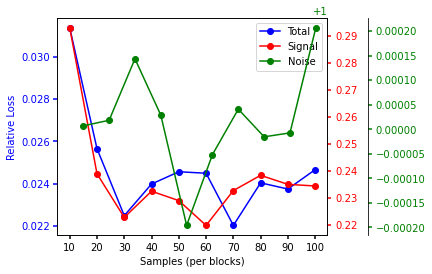

In [193]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)



fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)


par1 = host.twinx()
par2 = host.twinx()
par2.spines["right"].set_position(("axes", 1.15))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

p1, = host.plot(np.arange(1,11,step=1), visual[0], "b-", label="Total", marker='o')
p2, = par1.plot(np.arange(1,11,step=1), visual[1], "r-", label="Signal", marker='o')
p3, = par2.plot(np.arange(1,11,step=1), visual[2], "g-", label="Noise", marker='o')

plt.xticks(np.arange(0, 11, step=1), np.arange(0,110, step=10))


host.set_xlabel("Samples (per blocks)")
host.set_ylabel("Relative Loss")


host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])
plt.show()
fig.savefig("./result/relative_loss.png", dpi=300)

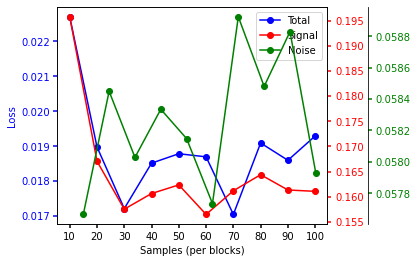

<Figure size 2160x144 with 0 Axes>

In [195]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)



fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)


par1 = host.twinx()
par2 = host.twinx()
par2.spines["right"].set_position(("axes", 1.15))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

p1, = host.plot(np.arange(1,11,step=1), visual[0], "b-", label="Total", marker='o')
p2, = par1.plot(np.arange(1,11,step=1), visual[1], "r-", label="Signal", marker='o')
p3, = par2.plot(np.arange(1,11,step=1), visual[2], "g-", label="Noise", marker='o')

plt.xticks(np.arange(0, 11, step=1), np.arange(0,110, step=10))


host.set_xlabel("Samples (per blocks)")
host.set_ylabel("Loss")


host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]
plt.figure(figsize=(30,2))
host.legend(lines, [l.get_label() for l in lines])
plt.show()
fig.savefig("./result/loss.png", dpi=300)

In [194]:
visual = [test.gen_loss, test.signal_loss, test.noise_loss]

## Compare

In [3]:
result = "./result/test_1_03/test_1_03method"
test_result = []
for i in range(1,11):
    i = str(i)
    data = pd.read_csv(result+i)
    test_result.append(data)
test = pd.concat(test_result, ignore_index=True)
test

,Unnamed: 0,gen_loss,gen_relative_loss,signal_loss,signal_relative_loss,noise_loss,noise_relative_loss
0,0,0.014139,0.021019,0.202191,0.307047,0.057706,1.000960
1,0,0.015333,0.020011,0.177968,0.263563,0.058531,1.001536
2,0,0.013225,0.015541,0.172446,0.249169,0.058151,1.002281
3,0,0.013402,0.015942,0.173650,0.252613,0.058413,1.001589
4,0,0.012912,0.015440,0.175903,0.258567,0.058214,1.001042
5,0,0.012568,0.016423,0.174848,0.255893,0.057752,1.000447
6,0,0.013206,0.015924,0.172881,0.253394,0.058946,1.000929
7,0,0.012816,0.017396,0.174643,0.257866,0.058572,1.001981
8,0,0.010010,0.011958,0.173849,0.256827,0.058977,1.002201
9,0,0.014616,0.018749,0.173682,0.255794,0.058041,1.002655


In [4]:
result = "./result/test_1_04/test_1_04method"
test_result = []
for i in range(1,11):
    i = str(i)
    data = pd.read_csv(result+i)
    test_result.append(data)
test_1_04 = pd.concat(test_result, ignore_index=True)
test_1_04

,Unnamed: 0,gen_loss,gen_relative_loss,signal_loss,signal_relative_loss,noise_loss,noise_relative_loss
0,0,0.001191,0.001924,0.209471,0.314310,0.057666,1.000018
1,0,0.001798,0.002302,0.174166,0.255013,0.058445,0.999903
2,0,0.001494,0.002183,0.169956,0.244410,0.058026,1.000010
3,0,0.002516,0.004021,0.179160,0.255887,0.058334,0.999542
4,0,0.001407,0.002184,0.175330,0.259428,0.058153,1.000069
5,0,0.001634,0.002518,0.173005,0.254944,0.057735,1.000117
6,0,0.000567,0.000806,0.172462,0.253567,0.058923,1.000075
7,0,0.001340,0.001802,0.178363,0.260325,0.058482,1.000184
8,0,0.000952,0.001323,0.174038,0.258825,0.058826,0.999939
9,0,0.003089,0.004592,0.359781,0.383024,0.057928,0.999986


In [24]:
gen_relative_loss= [test.gen_relative_loss, test_1_04.gen_relative_loss]
file = ["gen_relative_loss", "signal_relative_loss"]

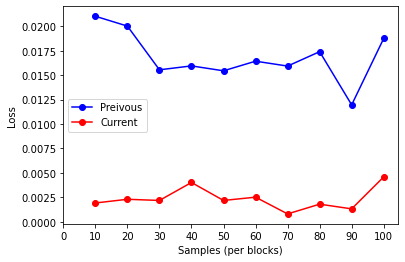

In [25]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)



fig, host = plt.subplots()

host.set_xlabel("Samples (per blocks)")
host.set_ylabel("Loss")

p1, = host.plot(np.arange(1,11,step=1), gen_relative_loss[0], "b-", label="Preivous", marker='o')
p2, = host.plot(np.arange(1,11,step=1), gen_relative_loss[1], "r-", label="Current", marker='o')

plt.xticks(np.arange(0, 11, step=1), np.arange(0,110, step=10))

lines = [p1, p2]

host.legend(lines, [l.get_label() for l in lines])
plt.show()
fig.savefig("./result/test_1_04/relative_loss.png", dpi=300)

In [26]:
signal_relative_loss= [test.signal_relative_loss, test_1_04.signal_relative_loss]
file = ["gen_relative_loss", "signal_relative_loss"]

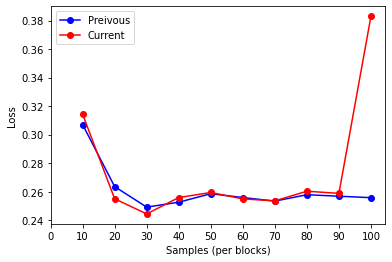

In [27]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)



fig, host = plt.subplots()

host.set_xlabel("Samples (per blocks)")
host.set_ylabel("Loss")

p1, = host.plot(np.arange(1,11,step=1), signal_relative_loss[0], "b-", label="Preivous", marker='o')
p2, = host.plot(np.arange(1,11,step=1), signal_relative_loss[1], "r-", label="Current", marker='o')

plt.xticks(np.arange(0, 11, step=1), np.arange(0,110, step=10))

lines = [p1, p2]

host.legend(lines, [l.get_label() for l in lines])
plt.show()
fig.savefig("./result/test_1_04/signal_loss.png", dpi=300)